We first import the libraries we are going to use in this assignment, pandas for data analysis, numpy for maths, and matplotlib.pyplot for plotting.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We then read in the data file `planets_2024.csv' using pandas.read_csv(), and print the head of the table to see categories etc.

In [61]:
# Read in the data, from .csv to a dataframe. 
data_file = pd.read_csv('/home/dj-lawton/Documents/Junior Sophister/Computer Simulation/Python/Lab1/planets_2024.csv', skiprows=16)

# Print the head of the dataframe, to see the structure, ie. columns, names, etc.
data_file.head()

,pl_name,hostname,disc_year,disc_facility,pl_orbsmax,pl_bmassj,st_mass,sy_dist
0,11 Com b,11 Com,2007,Xinglong Station,1.178,15.464,2.09,93.1846
1,11 UMi b,11 UMi,2009,Thueringer Landessternwarte Tautenburg,1.530,14.740,2.78,125.3210
2,14 And b,14 And,2008,Okayama Astrophysical Observatory,0.775,3.559,1.78,75.4392
3,14 Her b,14 Her,2002,W. M. Keck Observatory,2.774,8.053,0.91,17.9323
4,16 Cyg B b,16 Cyg B,1996,Multiple Observatories,1.660,1.780,1.08,21.1397


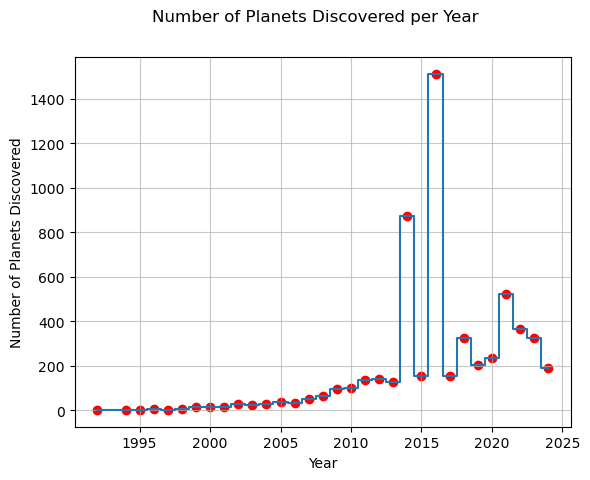

In [62]:
# Relabel series from data frame, for easier use, readability.
planet_disc_years = data_file['disc_year']
unique_disc_years = np.unique(planet_disc_years)

# Initialise list to store planets per year.
planets_per_year = []

# Counts the number of planets discovered per year.
for year in unique_disc_years:
    planets_per_year.append(len(planet_disc_years[planet_disc_years == year]))

fig, ax = plt.subplots()
fig.suptitle('Number of Planets Discovered per Year')

# Two plotting methods to better visualise the data.
ax.plot(unique_disc_years, planets_per_year, drawstyle='steps-mid')
ax.scatter(unique_disc_years, planets_per_year, color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Planets Discovered')
ax.grid(alpha=0.7)

plt.show()
plt.close()

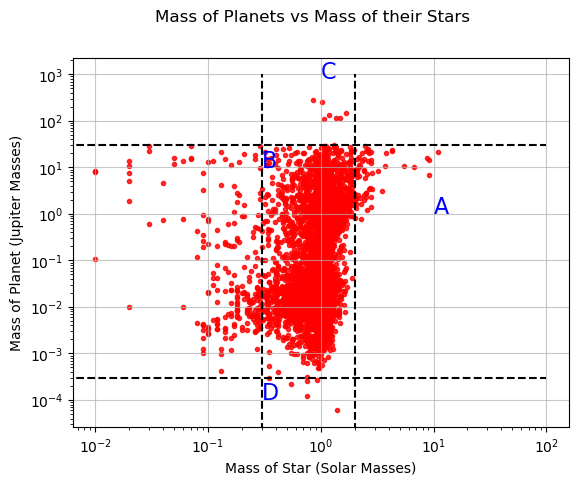

As is clear above, in region A, once a stars mass is over approx. 2 solar masses, only planets with mass on the order of magnitude of 1 Jupiter mass. 
 It can also be seen that the largest (greater than 30 jupiter masses) and smallest planetary masses (less than 0.0003 Jupiter masses) are only present orbiting stars with mass on the order of magnitude of approximately 1 solar mass.(regions C,D) 
 As well as this, the large majority of planets observed orbit stars of approximately between 0.5 and 2 solar masses (region B). I would suppose this indicates more the distribution of solar masses, rather than the distribution of planets.


In [63]:
# Relabel the data from the data frame.
planet_masses = data_file['pl_bmassj']
star_masses = data_file['st_mass']

fig, ax = plt.subplots()
fig.suptitle('Mass of Planets vs Mass of their Stars')

# Adding a grid, to allow easier viewing of the data.
ax.grid(alpha=0.7)

# Plotting a scatter plot of the data.
ax.scatter(star_masses, planet_masses, marker='.', color='red', alpha=0.8)
ax.set_xlabel('Mass of Star (Solar Masses)')
ax.set_ylabel('Mass of Planet (Jupiter Masses)')   

# Adding lines, text to aid discussion.
ax.vlines([2,0.3], [0,0], [1000, 1000], color='black', linestyle='--')
ax.hlines([30, 0.0003], [0,0], [100,100], color='black', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.text(10,1, 'A', color='blue', fontsize=16)
ax.text(0.3, 10, 'B', color='blue', fontsize=16)
ax.text(1, 800, 'C', color='blue', fontsize=16)
ax.text(0.3, 0.0001, 'D', color='blue', fontsize=16)


plt.show()
plt.close()

print('As is clear above, in region A, once a stars mass is over approx. 2 solar masses, only planets with mass on the order of magnitude of 1 Jupiter mass.',
      '\n',
      'It can also be seen that the largest (greater than 30 jupiter masses) and smallest planetary masses (less than 0.0003 Jupiter masses) are only present orbiting stars with mass on the order of magnitude of approximately 1 solar mass.(regions C,D)',
      '\n',
      'As well as this, the large majority of planets observed orbit stars of approximately between 0.5 and 2 solar masses (region B). I would suppose this indicates more the distribution of solar masses, rather than the distribution of planets.')

In [64]:

# Get the list of facility names, and create a list of unique facility names
facilities = data_file['disc_facility']
unique_facilities = np.unique(facilities)

# Initialise arrays to add data to later
facility_discoveries = np.zeros(len(unique_facilities))
first_discovery = np.zeros(len(unique_facilities))

# Converts the data to numpy arrays for easier manipulation
planet_disc_years = planet_disc_years.to_numpy()
facilities = facilities.to_numpy()

In [65]:

# Returns the indices of the ith facilities discoveries, 
# then adds the total number to the ith element of facility_discoveries,
# and the year of the first discovery to the ith element of first_discovery.
for i in range(len(unique_facilities)):
    facility_indices = np.where(facilities == unique_facilities[i])
    facility_discoveries[i] = len(facility_indices[0])
    first_discovery[i] = np.min(planet_disc_years[facility_indices])

# Gives the indices of facilities, sorted by number of discoveries, from least to most.
number_sorted_facilities_indices = facility_discoveries.argsort()

# Reduces this to the indices of the top ten, then uses these to find the names of the top ten facilities.
top_ten_indices = number_sorted_facilities_indices[-10:]
top_ten_facilities = unique_facilities[top_ten_indices]

# Sorts the top ten facilities by year of first discovery.
first_sorted_top_facilities_indices = first_discovery[top_ten_indices].argsort()
top_ten_facilities_by_first_disc = top_ten_facilities[first_sorted_top_facilities_indices]

# Formats the results into a list of lists, then prints them.
results_list = [[top_ten_facilities_by_first_disc[i], int(facility_discoveries[top_ten_indices[first_sorted_top_facilities_indices]][i]), int(first_discovery[top_ten_indices[first_sorted_top_facilities_indices]][i])] for i in range(10)]
print('The ten facilities with the most discoveries, sorted by year of first discovery:')
for i in range(10):
    print(results_list[i])
print('The facility with the most discoveries is', top_ten_facilities[-1], 'with', int(facility_discoveries[top_ten_indices][-1]))


The ten facilities with the most discoveries, sorted by year of first discovery:
['Multiple Observatories', 311, 1996]
['W. M. Keck Observatory', 189, 1998]
['La Silla Observatory', 285, 1999]
['OGLE', 104, 2002]
['SuperWASP', 113, 2007]
['Kepler', 2773, 2009]
['HATSouth', 73, 2012]
['K2', 548, 2014]
['KMTNet', 94, 2016]
['Transiting Exoplanet Survey Satellite (TESS)', 561, 2018]
The facility with the most discoveries is Kepler with 2773
